##*Elizabeth Torres Torrecillas* 


# *Evaluación 2*



---

---

---







In [107]:
#Importar bibliotecas a utilizar 
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint, solve_ivp

# `INSTRUCCIONES`
Se pide resolver numéricamente la ecuación diferencial de un [oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal](https://en.wikipedia.org/wiki/Harmonic_oscillator#Sinusoidal_driving_force), con ayuda de la función *odeint* de *scipy.integrate*.

La ecuación diferencial del oscilador amortiguado es

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}

y $\zeta$ es la tasa de amortiguamiento dado por la expresión

\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}

siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire. 

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$). 

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:


* Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar. 
* Críticamente amortiguado ($\zeta = 1$).
* Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente. 
* Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular. 



---




**Problema1.**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$: 

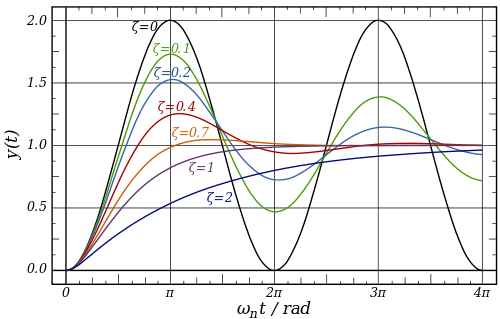

Nos proporcionan la información de que $ F_0 = 0 $

Con ello, podemos reescribir a la ecuación diferencial como:

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0
\end{equation*}$$

Proponemos un cambio de variable, de forma que:
$$\begin{equation*} v= \frac{d x}{d t}\\
\end{equation*}$$

Siendo:

$$\begin{equation*}
\frac{d v}{d t} = - 2 \zeta \omega_n v-\omega_n^2 x 
\end{equation*}$$


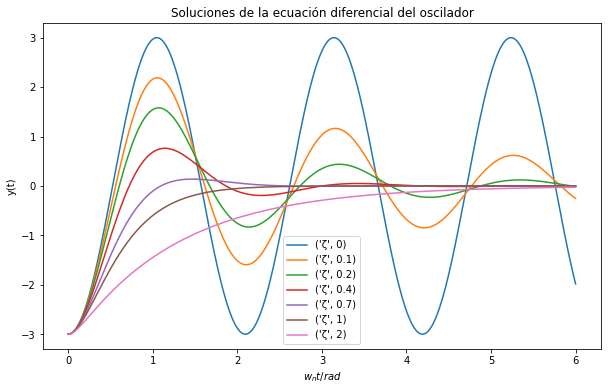

In [108]:
##Definimos las constantes del sistema
#masa del resorte
m = 1          
#Constante del resorte
k = 9        
#Frecuencia angular natural del oscilador
w = np.sqrt(k/m)
#Valores de z proporcionados 
z = [0,0.1,0.2,0.4,0.7,1,2]

#Definimos la función dx/dt para la solución del sistema
def f(y, t, z, w):
  x, v = y
  sol = [v,-2*z*w*v-(w**2)*x]
  return sol

##Definimos las condiciones iniciales del sistema
#siendo x(0)<0
y0 = [-3,0]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t = np.linspace(0,6,1200)
plt.figure(figsize=(10,6))

for z1 in z:
  y = odeint(f,y0,t, args= (z1,w))
  plt.plot(t,y[:,0], label=('ζ',z1))

plt.legend(loc='best')  
plt.ylabel('y(t)')
plt.xlabel('$w_nt/rad$')
plt.title('Soluciones de la ecuación diferencial del oscilador')
plt.show()





---


**Problema 2.**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

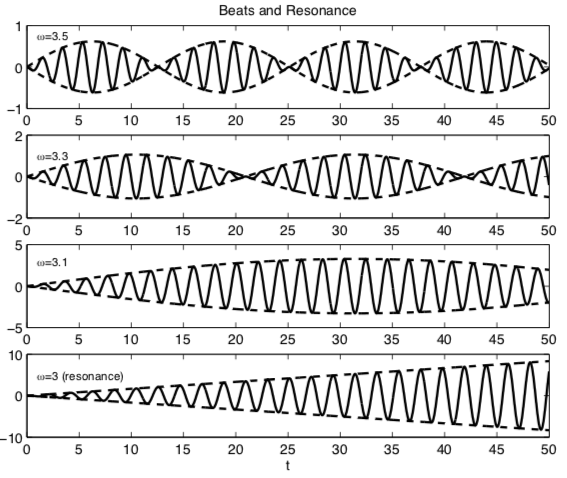

Nos proporcionan la información de que $\zeta = 0$

Con ello, podemos reescribir a la ecuación diferencial como:

\begin{equation*}
\frac{d^2 x}{d t^2} +\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}

Proponemos un cambio de variable, de forma que:
$$\begin{equation*} v= \frac{d x}{d t}\\
\end{equation*}$$

Siendo:

\begin{equation*}
\frac{d v}{d t} = - \omega_n^2 x - \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}


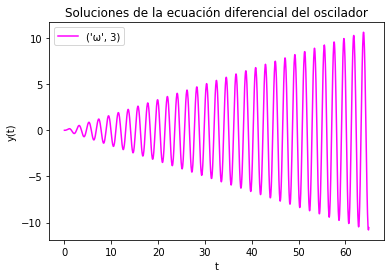

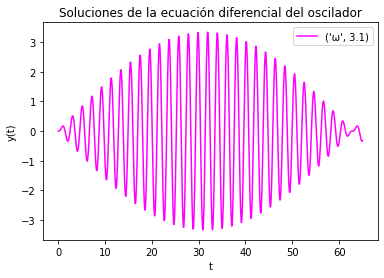

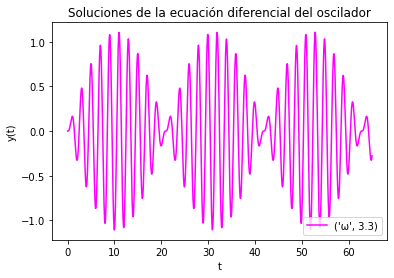

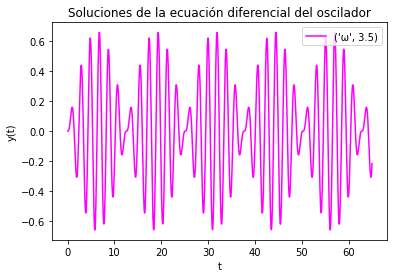

In [109]:
##Definimos las constantes del sistema
#masa del resorte
m = 1          
#Constante del resorte
k = 9        
#Amplitud
F0=1
#Frecuencia angular natural del oscilador
w = np.sqrt(k/m)
#Valores de omega proporcionados 
omega = [3,3.1,3.3,3.5]

#Definimos la función dx/dt para la solución del sistema
def f(y, t, omega):
  x, v = y
  sol = [v,np.sin(omega*t)-(w**2)*x]
  return sol

##Definimos las condiciones iniciales del sistema
#siendo x(0)=0
y0 = [0,0]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t = np.linspace(0,65,1200)

for omega1 in omega:
  y = odeint(f,y0,t, args= (omega1,))
  plt.plot(t,y[:,0], 'magenta', label=('ω',omega1))
  plt.legend(loc='best')  
  plt.ylabel('y(t)')
  plt.xlabel('t')
  plt.title('Soluciones de la ecuación diferencial del oscilador')
  plt.show()



---



**Problema 3.**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado. 


Siendo:

\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}


Proponemos un cambio de variable, de forma que:
$$\begin{equation*} v= \frac{d x}{d t}\\
\end{equation*}$$

Siendo:

\begin{equation*}
\frac{d v}{d t} = - \omega_n^2 x - \frac{1}{m } F_0 \sin(\omega t) - 2 \zeta \omega_n v
\end{equation*}


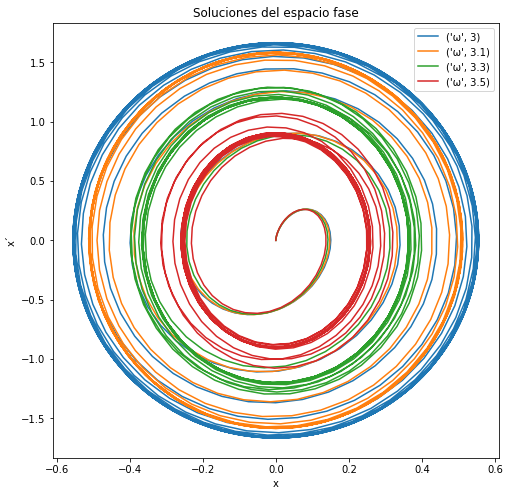

In [110]:
##Definimos las constantes del sistema
#masa del resorte
m = 1          
#Constante del resorte
k = 9        
#Amplitud
F0=1
#Tasa de amortiguamiento 
z=0.1
#Frecuencia angular natural del oscilador
w = np.sqrt(k/m)
#Valores de omega proporcionados 
omega = [3,3.1,3.3,3.5]

#Definimos la función dx/dt para la solución del sistema
def f(y, t, omega):
  x, v = y
  sol = [v,np.sin(omega*t)-(w**2)*x-2*z*w*v]
  return sol

##Definimos las condiciones iniciales del sistema
#siendo x(0)=0
y0 = [0,0]

#Definimos los puntos de interés donde se desean determinar los valores de la solución
t = np.linspace(0,65,1200)
plt.figure(figsize=(8,8))

for omega1 in omega:
  y = odeint(f,y0,t, args= (omega1,))
  plt.plot(y[:,0],y[:,1], label=('ω',omega1))
plt.legend(loc='best')  
plt.ylabel('x´')
plt.xlabel('x')
plt.title('Soluciones del espacio fase')
plt.show()



---

